# Handin exercise for week 5: Pandas

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/statistikbanken/api
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married'?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
  


## Ex2 Use another table
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1B,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, statsborgerskab, tid]"
2,FOLK1C,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, herkomst, oprindelsesland..."
3,FOLK1D,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, statsborgerskab, tid]"
4,FOLK1E,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, herkomst, tid]"
5,FOLK2,Folketal 1. januar,antal,2020-02-11T08:00:00,1980,2020,True,"[alder, køn, herkomst, statsborgerskab, oprind..."
6,FOLK3,Folketal 1. januar,antal,2020-02-11T08:00:00,2008,2020,True,"[fødselsdag, fødselsmåned, fødselsår, tid]"
7,FT,Folketal (summariske tal fra folketællinger),antal,2020-02-11T08:00:00,1769,2020,True,"[hovedlandsdele, tid]"
8,BEF5F,Personer født på Færøerne og bosat i Danmark 1...,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"
9,BEF5G,Personer født i Grønland og bosat i Danmark 1....,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"


Percentage difference in divorved danes from 08 - 20 : -16.259842277599247
{'København': 65.23579087199924, 'Aalborg': 54.448462512956354, 'Esbjerg': 47.63818051141727, 'Odense': 54.90129090509773, 'Aarhus': 59.576893734838556}


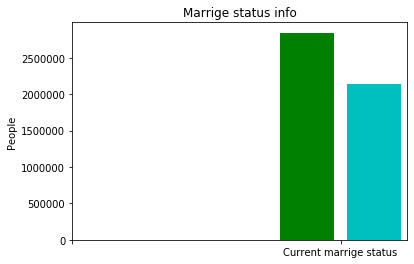

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
# What is the change in pct of divorced danes from 2008 to 2020?
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?Tid=2008K1%2C2020K1&CIVILSTAND=TOT%2CF'
data = pd.read_csv(url,sep=';')

d08 = data['INDHOLD'][0]/data['INDHOLD'][1]
d20 = data['INDHOLD'][2]/data['INDHOLD'][3]
pct_change = (d20/d08 * 100)-100
print("Percentage difference in divorved danes from 08 - 20 : " + str(pct_change))

#Which of the 5 biggest cities has the highest percentage of 'Never Married'?
url1 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&Tid=2020K1&CIVILSTAND=TOT%2CU&K%C3%98N=TOT&OMR%C3%85DE=101%2C851%2C561%2C461%2C751&ALDER=IALT'
data1 = pd.read_csv(url1,sep=';')

not_married_pct = {data1['OMRÅDE'][not_married][4:]:data1['INDHOLD'][not_married]/data1['INDHOLD'][all_people]*100 for not_married, all_people in zip(range(5,10),range(0,5))}

five_biggest_non_married_cities = {}
for not_married, all_people in zip(range(5,10),range(0,5)):
    pct_not_married = data1['INDHOLD'][not_married]/data1['INDHOLD'][all_people]*100
    city = data1['OMRÅDE'][not_married][4:]
    five_biggest_non_married_cities[city]= pct_not_married
    
print(five_biggest_non_married_cities)



#Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

url ='https://api.statbank.dk/v1/data/FOLK1A/CSV?ALDER=IALT&CIVILSTAND=U%2CG&OMR%C3%85DE=000'
data = pd.read_csv(url, sep=';')
married_mask = [data["INDHOLD"][0]]
non_married_mask = [data["INDHOLD"][1]]
fig, ax = plt.subplots()
married_bar = ax.bar(1 - 0.125, married_mask, width=0.20, color="g")
non_married_bar = ax.bar(1 + 0.125, non_married_mask, width=0.20, color="c")
ax.set_ylabel("Amount of people")
ax.set_title("Marrige status info")
plt.xticks(range(2), labels=["","Current marrige status"])
plt.show()
